In [1]:
import os
import cv2
import time
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

from diploma.drawing import draw_images
from diploma.models import LivenessPytorch

In [2]:
df = pd.read_csv('E:/kbtu_courses/diploma_project/src/diploma/models/liveness/model_training/csv_data/test_v2_upd.csv')

live = LivenessPytorch("E:/kbtu_courses/diploma_project/liveness_v6.pt")

df

,path,label
0,E:/kbtu_courses/diploma_project/src/diploma/da...,0
1,E:/kbtu_courses/diploma_project/src/diploma/da...,1
2,E:/kbtu_courses/diploma_project/src/diploma/da...,0
3,E:/kbtu_courses/diploma_project/src/diploma/da...,1
4,E:/kbtu_courses/diploma_project/src/diploma/da...,0
...,...,...
2280,E:/kbtu_courses/diploma_project/src/diploma/da...,0
2281,E:/kbtu_courses/diploma_project/src/diploma/da...,0
2282,E:/kbtu_courses/diploma_project/src/diploma/da...,1
2283,E:/kbtu_courses/diploma_project/src/diploma/da...,0


# Preprocess

In [3]:
scores = []

for i in tqdm(range(2285)):
    x = cv2.imread(df.iloc[i, 0])

    score = live(x)
    scores.append(score)

df['scores'] = scores

100%|██████████| 2285/2285 [02:20<00:00, 16.28it/s]


In [4]:
df

,path,label,scores
0,E:/kbtu_courses/diploma_project/src/diploma/da...,0,0.002531
1,E:/kbtu_courses/diploma_project/src/diploma/da...,1,0.996666
2,E:/kbtu_courses/diploma_project/src/diploma/da...,0,0.001753
3,E:/kbtu_courses/diploma_project/src/diploma/da...,1,0.996335
4,E:/kbtu_courses/diploma_project/src/diploma/da...,0,0.007546
...,...,...,...
2280,E:/kbtu_courses/diploma_project/src/diploma/da...,0,0.004467
2281,E:/kbtu_courses/diploma_project/src/diploma/da...,0,0.006033
2282,E:/kbtu_courses/diploma_project/src/diploma/da...,1,0.997935
2283,E:/kbtu_courses/diploma_project/src/diploma/da...,0,0.001395


In [5]:
df.to_csv("liveness_quality.csv", index=False)

# Quality

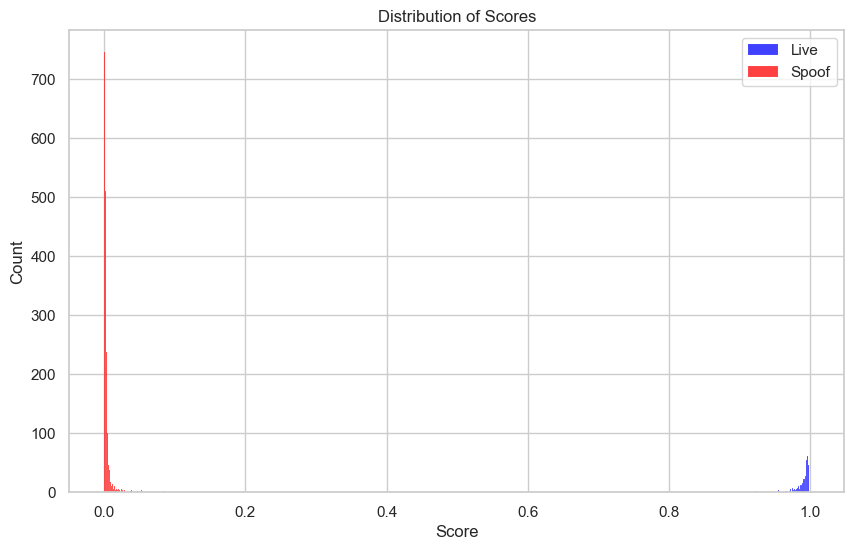

In [13]:
df = pd.read_csv("liveness_quality.csv")

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='scores', hue='label', multiple='stack', palette=['red', 'blue'])

plt.xlabel('Score')

plt.title('Distribution of Scores')
plt.legend(title='', labels=['Live', 'Spoof'], loc='upper right')
plt.show()

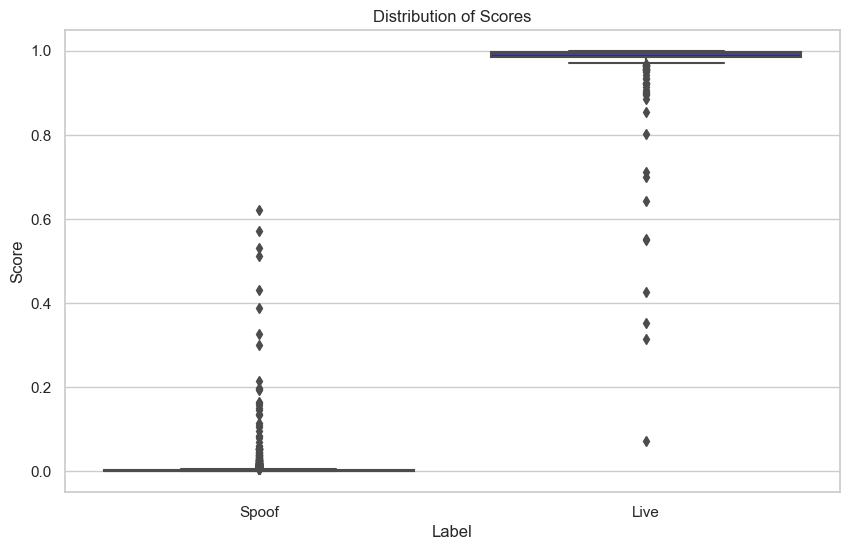

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='scores', palette=['red', 'blue'])
plt.xlabel('Label')
plt.ylabel('Score')
plt.xticks(ticks=[0, 1], labels=['Spoof', 'Live'])
plt.title('Distribution of Scores')
plt.show()

In [10]:
df[df['label']==1].describe()

,label,scores
count,418.0,418.000000
mean,1.0,0.976374
std,0.0,0.081667
min,1.0,0.072232
25%,1.0,0.985627
50%,1.0,0.993525
75%,1.0,0.996657
max,1.0,0.999035


In [11]:
df[df['label']==0].describe()

,label,scores
count,1867.0,1867.000000
mean,0.0,0.006649
std,0.0,0.034290
min,0.0,0.000064
25%,0.0,0.000857
50%,0.0,0.001584
75%,0.0,0.003072
max,0.0,0.621033


# Speed

In [12]:
computation_times = []

for i in tqdm(range(2285)):
    x = cv2.imread(df.iloc[i, 0])

    start_time = time.time()
    score = live(x)
    end_time = time.time()

    computation_time = end_time - start_time
    computation_times.append(computation_time)

average = sum(computation_times) / len(computation_times)
print("Average computation time:", average, "seconds")

100%|██████████| 2285/2285 [03:01<00:00, 12.56it/s]

Average computation time: 0.07012501743742361 seconds
